# Batch UCB
- use your favorite kernel to generate distance matrix
- clustering (k-metriod)
- large clustering numbers: reject clustering for which the max UCB is smaller other clustering's LCB; then choose sequences in the remaining clusterings by UCB.
- small clustering numbers, e.g. 90, choose one sequence from each clustering by UCB.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn_extra.cluster import KMedoids

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *
from codes.batch_ucb import *

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

/home/admin-u6015325/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Path = '../../data/firstRound_Microplate_normTrue_formatSeq_logTrue.csv'

known_df = pd.read_csv(Path)
known_df.head()

,Unnamed: 0,Name,Group,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,AVERAGE,STD
0,0,RBS_1by1_0,reference,TTTAAGAAGGAGATATACAT,AGGAGA,1.616261,1.814182,1.760954,2.186207,2.028863,1.831982,1.881293,0.225819
1,1,RBS_1by1_1,bps_noncore,CTTAAGAAGGAGATATACAT,AGGAGA,1.166174,1.337018,1.417248,1.493800,1.713526,1.644568,1.425553,0.201725
2,2,RBS_1by1_2,bps_noncore,GTTAAGAAGGAGATATACAT,AGGAGA,0.604551,0.751384,0.851987,0.514929,0.577299,0.795227,0.660030,0.137994
3,3,RBS_1by1_3,bps_noncore,ATTAAGAAGGAGATATACAT,AGGAGA,1.221264,1.466278,1.270212,1.341040,1.395030,1.175433,1.338765,0.097386
4,4,RBS_1by1_4,bps_noncore,TCTAAGAAGGAGATATACAT,AGGAGA,1.160566,1.579025,1.171829,1.590670,1.411255,1.756862,1.382669,0.210012


In [3]:
top_n = Top_n_ucb(known_df, kernel_name='WD_Kernel_Shift', l=6, s=1,
                 embedding='label', alpha=0.1, rec_size=90, beta=1)

In [4]:
top_n_rec_df = top_n.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg


In [5]:
gpbucb = GP_BUCB(known_df, kernel_name='WD_Kernel_Shift', l=6, s=1,
                embedding='label', alpha=0.1, rec_size=90, beta=1)

In [6]:
gpbucb_rec_df = gpbucb.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (177, 15)
X train shape:  (1056, 20)
X test shape:  (3960, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (178, 15)
X train shape:  (1057, 20)
X test shape:  (3959, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (179, 15)
X train shape:  (1058, 20)
X test shape:  (3958, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (180, 15)
X train shape:  (1059, 20)
X test shape:  (3957, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (181, 15)
X train shape:  (1060, 20)
X test shape:  (3956, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (182, 15)
X train shape:  

X train shape:  (1105, 20)
X test shape:  (3911, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (227, 15)
X train shape:  (1106, 20)
X test shape:  (3910, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (228, 15)
X train shape:  (1107, 20)
X test shape:  (3909, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (229, 15)
X train shape:  (1108, 20)
X test shape:  (3908, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (230, 15)
X train shape:  (1109, 20)
X test shape:  (3907, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (231, 15)
X train shape:  (1110, 20)
X test shape:  (3906, 20)
create kernel instance
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (232, 15)
X train shape:  

In [7]:
gpbucb_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
0,1061,NaN,NaN,NaN,TTTAAGATGCTACTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.631317,0.804478,2.435795
1,1060,NaN,NaN,NaN,TTTAAGAGCCCCGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.342185,0.903600,2.245785
2,2358,NaN,NaN,NaN,TTTAAGAGCTACGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.328121,0.839756,2.167876
3,2602,NaN,NaN,NaN,TTTAAGAGCGATGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.468597,0.901331,2.369928
4,1057,NaN,NaN,NaN,TTTAAGATCACCATATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.132150,0.984871,2.117020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1325,NaN,NaN,NaN,TTTAAGACTCGCATATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.851205,1.022506,1.873711
86,867,NaN,NaN,NaN,TTTAAGACGTGTCTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.108728,0.962144,2.070872
87,3616,NaN,NaN,NaN,TTTAAGAATGGCGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.203412,0.889135,2.092548
88,1666,NaN,NaN,NaN,TTTAAGATCGCAGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.036751,0.948107,1.984858


In [8]:
top_n_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
1237,1061,NaN,NaN,NaN,TTTAAGATGCTACTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.631317,0.804478,2.435795
2845,2669,NaN,NaN,NaN,TTTAAGATGCTATTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.572750,0.797754,2.370505
1683,1507,NaN,NaN,NaN,TTTAAGATGCTGGTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.458624,0.825690,2.284314
861,685,NaN,NaN,NaN,TTTAAGAGGCTACTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.443215,0.794618,2.237833
1330,1154,NaN,NaN,NaN,TTTAAGACGCTACTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.394639,0.798577,2.193216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,1529,NaN,NaN,NaN,TTTAAGAGTCTGCTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.020509,0.773430,1.793938
1593,1417,NaN,NaN,NaN,TTTAAGACTCTGCTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.102147,0.689059,1.791206
2647,2471,NaN,NaN,NaN,TTTAAGATTCTGCTATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.059733,0.731376,1.791108
3230,3054,NaN,NaN,NaN,TTTAAGATGCTAATATACAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.988763,0.800421,1.789184


init kernel


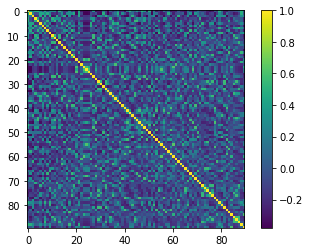

In [9]:
wd_kernel = WD_Shift_Kernel
wd_kernel.INIT_FLAG = False
plt.imshow(wd_kernel(l=6, features = np.asarray(top_n_rec_df['RBS'])).kernel_all_normalised)
plt.colorbar()

init kernel


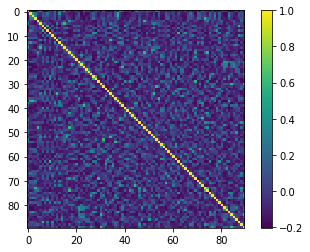

In [10]:
wd_kernel.INIT_FLAG = False
plt.imshow(wd_kernel(l=6, features = np.asarray(gpbucb_rec_df['RBS'])).kernel_all_normalised)
plt.colorbar()

init kernel


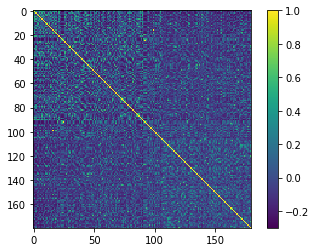

In [12]:
wd_kernel.INIT_FLAG = False
all_features = np.concatenate((np.asarray(top_n_rec_df['RBS']), np.asarray(gpbucb_rec_df['RBS'])), axis = 0)
plt.imshow(wd_kernel(l=6, features = all_features).kernel_all_normalised)
plt.colorbar()

In [15]:
set(top_n_rec_df['RBS']).intersection(set(gpbucb_rec_df['RBS']))

{'TTTAAGAGCTACGTATACAT', 'TTTAAGAGTCTATTATACAT', 'TTTAAGATGCTACTATACAT'}